In [1]:
import satpy
from satpy import Scene
from glob import glob
from satpy.writers import get_enhanced_image
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from pyresample import create_area_def
from pathlib import Path
import xarray as xr

In [2]:
filename = "/home/eefjg/OneDrive/Leeds/PhD/Data/MODIS/Ice/MYD29.A2022073.1600.061.2022074152652.hdf"

In [7]:
# Satpy reader doesn't currently support this product :(

scn = Scene(reader='modis_l2', filenames=[filename])
scn.keys()

ValueError: No supported files found

In [11]:
ds = xr.open_dataset(filename, engine="netcdf4")
ds

<xarray.Dataset> Size: 56MB
Dimensions:                           (
                                       Coarse_swath_lines_5km:MOD_Swath_Sea_Ice: 406,
                                       Coarse_swath_pixels_5km:MOD_Swath_Sea_Ice: 271,
                                       Along_swath_lines_1km:MOD_Swath_Sea_Ice: 2030,
                                       Cross_swath_pixels_1km:MOD_Swath_Sea_Ice: 1354)
Dimensions without coordinates: Coarse_swath_lines_5km:MOD_Swath_Sea_Ice,
                                Coarse_swath_pixels_5km:MOD_Swath_Sea_Ice,
                                Along_swath_lines_1km:MOD_Swath_Sea_Ice,
                                Cross_swath_pixels_1km:MOD_Swath_Sea_Ice
Data variables:
    Latitude                          (Coarse_swath_lines_5km:MOD_Swath_Sea_Ice, Coarse_swath_pixels_5km:MOD_Swath_Sea_Ice) float32 440kB ...
    Longitude                         (Coarse_swath_lines_5km:MOD_Swath_Sea_Ice, Coarse_swath_pixels_5km:MOD_Swath_Sea_Ice) float32 440kB ...
    Sea_Ice_by_Reflectance            (Along_swath_lines_1km:MOD_Swath_Sea_Ice, Cross_swath_pixels_1km:MOD_Swath_Sea_Ice) float32 11MB ...
    Sea_Ice_by_Reflectance_Pixel_QA   (Along_swath_lines_1km:MOD_Swath_Sea_Ice, Cross_swath_pixels_1km:MOD_Swath_Sea_Ice) float32 11MB ...
    Ice_Surface_Temperature           (Along_swath_lines_1km:MOD_Swath_Sea_Ice, Cross_swath_pixels_1km:MOD_Swath_Sea_Ice) float64 22MB ...
    Ice_Surface_Temperature_Pixel_QA  (Along_swath_lines_1km:MOD_Swath_Sea_Ice, Cross_swath_pixels_1km:MOD_Swath_Sea_Ice) float32 11MB ...
Attributes:
    HDFEOSVersion:                     HDFEOS_V2.19
    StructMetadata.0:                  GROUP=SwathStructure\n\tGROUP=SWATH_1\...
    L1BCalibrationQuality:             marginal
    L1BMissionPhase:                   EXECUTION
    L1BAutoQA_EV_1KM_RefsB:            Suspect
    L1BNadirPointing:                  Y
    L1BVersionID:                      2022-03-14
    identifier_product_doi:            10.5067/MODIS/MYD29.061
    identifier_product_doi_authority:  http://dx.doi.org
    CoreMetadata.0:                    \nGROUP                  = INVENTORYME...
    ArchiveMetadata.0:                 \nGROUP                  = ARCHIVEDMET...

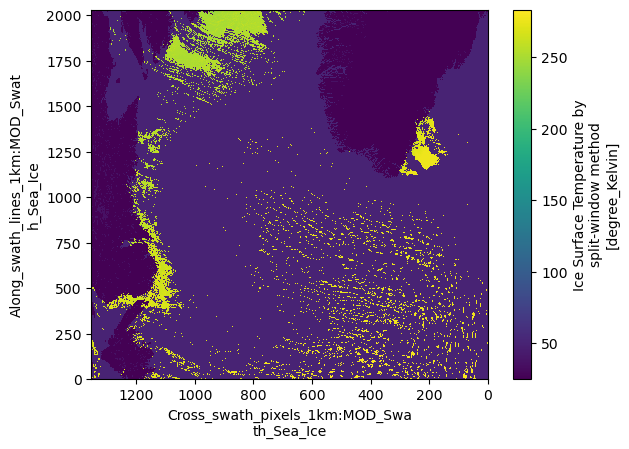

In [18]:
ds['Ice_Surface_Temperature'].plot()
plt.gca().invert_xaxis()

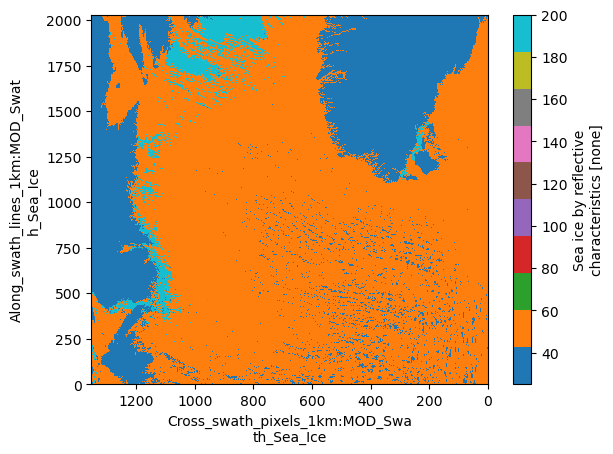

In [23]:
# 0=missing data, 1=no decision, 11=night, 25=land, 37=inland water, 39=ocean, 
# 50=cloud, 100=lake ice, 200=sea ice, 254=detector saturated, 255=fill


ds['Sea_Ice_by_Reflectance'].plot(cmap='tab10')
plt.gca().invert_xaxis()

Blue = Ocean or land, orange = cloud, light blue = sea ice  
May be useful as a starting point for masking ice, but doesn't reveal sea ice where there is high cloud cover. (Does anything?)  
From docs: "Sea ice analysis is constrained to daylight ocean pixels that have visible reflectance greater than 10 percent and are not obstructed by clouds."  
Cloud mask is applied before sea ice retrieval.  
https://nsidc.org/sites/default/files/myd29-v061-userguide_1.pdf#page=13.07  
Also has some small specks of 'ice' in the cumulus area.  
Does already contain a land mask though, so could be useful just for that.